In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import math
import statistics as stat
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec


In [ ]:
data= pd.read_csv('/gdrive/My Drive/Active_Learning_Expt/Yeast3.csv',header=None)

In [ ]:
data

,0,1,2,3,4,5,6,7,8
0,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
1,0.64,0.62,0.49,0.15,0.5,0,0.53,0.22,negative
2,0.58,0.44,0.57,0.13,0.5,0,0.54,0.22,negative
3,0.42,0.44,0.48,0.54,0.5,0,0.48,0.22,negative
4,0.51,0.4,0.56,0.17,0.5,0.5,0.49,0.22,negative
...,...,...,...,...,...,...,...,...,...
1480,0.77,0.74,0.37,0.29,0.5,0,0.45,0.22,negative
1481,0.74,0.75,0.45,0.44,0.5,0,0.52,0.22,negative
1482,0.32,0.29,0.29,0.08,0.5,0,0.52,0.22,positive
1483,0.38,0.48,0.57,0.3,0.5,0,0.41,0.11,negative


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
dict={0:"Mcg",1:'Gvh',2:'Alm',3:'Mit',4:'Erl',5:'Pox',6:'Vac',7:'Nuc',8:'Class'}

In [ ]:
data.rename(columns=dict, inplace=True)

In [ ]:
data

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
1,0.64,0.62,0.49,0.15,0.5,0,0.53,0.22,negative
2,0.58,0.44,0.57,0.13,0.5,0,0.54,0.22,negative
3,0.42,0.44,0.48,0.54,0.5,0,0.48,0.22,negative
4,0.51,0.4,0.56,0.17,0.5,0.5,0.49,0.22,negative
...,...,...,...,...,...,...,...,...,...
1480,0.77,0.74,0.37,0.29,0.5,0,0.45,0.22,negative
1481,0.74,0.75,0.45,0.44,0.5,0,0.52,0.22,negative
1482,0.32,0.29,0.29,0.08,0.5,0,0.52,0.22,positive
1483,0.38,0.48,0.57,0.3,0.5,0,0.41,0.11,negative


In [ ]:
data[:1]

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class


In [ ]:
# Dropping the first row of the dataset
data.drop(data.index[:1], inplace=True)

In [ ]:
data

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
1,0.64,0.62,0.49,0.15,0.5,0,0.53,0.22,negative
2,0.58,0.44,0.57,0.13,0.5,0,0.54,0.22,negative
3,0.42,0.44,0.48,0.54,0.5,0,0.48,0.22,negative
4,0.51,0.4,0.56,0.17,0.5,0.5,0.49,0.22,negative
5,0.5,0.54,0.48,0.65,0.5,0,0.53,0.22,negative
...,...,...,...,...,...,...,...,...,...
1480,0.77,0.74,0.37,0.29,0.5,0,0.45,0.22,negative
1481,0.74,0.75,0.45,0.44,0.5,0,0.52,0.22,negative
1482,0.32,0.29,0.29,0.08,0.5,0,0.52,0.22,positive
1483,0.38,0.48,0.57,0.3,0.5,0,0.41,0.11,negative


In [ ]:
data.dtypes

Mcg      object
Gvh      object
Alm      object
Mit      object
Erl      object
Pox      object
Vac      object
Nuc      object
Class    object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encoding the Class Column:

labelencoder = LabelEncoder()

#Assigning numerical values and stroing it another column called Class_Numerical

data["Class_Numerical"]= labelencoder.fit_transform(data["Class"])

# Display new DataFrame:

data

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class,Class_Numerical
1,0.64,0.62,0.49,0.15,0.5,0,0.53,0.22,negative,0
2,0.58,0.44,0.57,0.13,0.5,0,0.54,0.22,negative,0
3,0.42,0.44,0.48,0.54,0.5,0,0.48,0.22,negative,0
4,0.51,0.4,0.56,0.17,0.5,0.5,0.49,0.22,negative,0
5,0.5,0.54,0.48,0.65,0.5,0,0.53,0.22,negative,0
...,...,...,...,...,...,...,...,...,...,...
1480,0.77,0.74,0.37,0.29,0.5,0,0.45,0.22,negative,0
1481,0.74,0.75,0.45,0.44,0.5,0,0.52,0.22,negative,0
1482,0.32,0.29,0.29,0.08,0.5,0,0.52,0.22,positive,1
1483,0.38,0.48,0.57,0.3,0.5,0,0.41,0.11,negative,0


In [ ]:
data.dtypes

Mcg                object
Gvh                object
Alm                object
Mit                object
Erl                object
Pox                object
Vac                object
Nuc                object
Class              object
Class_Numerical     int64
dtype: object

In [ ]:
# Converted the columns from Object to int/float

data["Mcg"] = data['Mcg'].astype('float')
data["Gvh"] = data['Gvh'].astype('float')
data["Alm"] = data['Alm'].astype('float')
data["Mit"] = data['Mit'].astype('float')
data["Erl"] = data['Erl'].astype('float')
data["Pox"] = data['Pox'].astype('float')
data["Vac"] = data['Vac'].astype('float')
data["Nuc"] = data['Nuc'].astype('float')

In [ ]:
data.dtypes

Mcg                float64
Gvh                float64
Alm                float64
Mit                float64
Erl                float64
Pox                float64
Vac                float64
Nuc                float64
Class               object
Class_Numerical      int64
dtype: object

In [ ]:
data.drop(columns='Class',axis=1,inplace=True)

In [ ]:
data

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class_Numerical
1,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,0
2,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,0
3,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,0
4,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,0
5,0.50,0.54,0.48,0.65,0.5,0.0,0.53,0.22,0
...,...,...,...,...,...,...,...,...,...
1480,0.77,0.74,0.37,0.29,0.5,0.0,0.45,0.22,0
1481,0.74,0.75,0.45,0.44,0.5,0.0,0.52,0.22,0
1482,0.32,0.29,0.29,0.08,0.5,0.0,0.52,0.22,1
1483,0.38,0.48,0.57,0.30,0.5,0.0,0.41,0.11,0


In [ ]:
data.dtypes

Mcg                float64
Gvh                float64
Alm                float64
Mit                float64
Erl                float64
Pox                float64
Vac                float64
Nuc                float64
Class_Numerical      int64
dtype: object

In [ ]:
data.value_counts(data["Class_Numerical"])

Class_Numerical
0    1321
1     163
dtype: int64

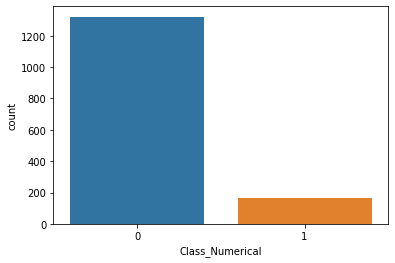

In [ ]:
import seaborn as sns
sns.countplot("Class_Numerical",data=data)

In [ ]:
# Copying the dataset for safety purpose

copy_data= data

print(copy_data.head())
print(type(copy_data))

    Mcg   Gvh   Alm   Mit  Erl  Pox   Vac   Nuc  Class_Numerical
1  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22                0
2  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22                0
3  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22                0
4  0.51  0.40  0.56  0.17  0.5  0.5  0.49  0.22                0
5  0.50  0.54  0.48  0.65  0.5  0.0  0.53  0.22                0
<class 'pandas.core.frame.DataFrame'>


In [ ]:
pip install modAL

In [ ]:
# Importing all Required modules
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
import matplotlib as mpl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from functools import partial
#from modAL.batch import uncertainty_batch_sampling
from modAL.batch import uncertainty_batch_sampling, ranked_batch
from modAL.models import ActiveLearner,Committee
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile, where, random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import math
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import IsolationForest


In [ ]:
def feature_selection(dataset,targets):
  """
  :param dataset: dataframe object containing all records of features
  :param targets: dataframe object of target values corresponding to dataset
  :return: returns new dataset with mentioned number of features
  """
  number_of_features = int(input("Total Number of features "+str(dataset.shape[1])+" , Enter number of best features needed:- "))
  selector = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=number_of_features, step=1)
  selector.fit(dataset, targets)
  new_dataset = selector.transform(dataset)
  
  return pd.DataFrame(new_dataset)


In [ ]:
def Lof(data,number_of_top_outliers):
  """
  :param data: features values
  :param number_of_top_outliers: number of top ranked outliers
  :return: all top n outliers indices of data.
  """
  clf = LocalOutlierFactor(n_neighbors=2)
  y_pred = clf.fit_predict(data)
  score = clf.negative_outlier_factor_
  # very small number --> more the outlier
  # eg: -40000 --> outlier
  # -1.2  --> Not Outlier
  top_outlier_indices = score.argsort()[:number_of_top_outliers]
  return top_outlier_indices


In [ ]:
def OneClassSVMOutlier(data,number_of_top_outliers):
  """
  :param data: features values
  :param number_of_top_outliers: number of top ranked outliers
  :return: all top n outliers indices of data.
  """
  clf = OneClassSVM(gamma='auto')
  y_pred = clf.fit_predict(data)
  score = clf.score_samples(data)
  # very small number --> more the outlier
  # eg: -40000 --> outlier
  # -1.2  --> Not Outlier
  top_outlier_indices = score.argsort()[:number_of_top_outliers]
  return top_outlier_indices


In [ ]:
def IForest(data,number_of_top_outliers):
  """
  :param data: features values
  :param number_of_top_outliers: number of top ranked outliers
  :return: all top n outliers indices of data.
  """
  clf = IsolationForest(random_state=0)
  y_pred = clf.fit_predict(data)
  score = clf.score_samples(data)
  
  top_outlier_indices = score.argsort()[:number_of_top_outliers]
  return top_outlier_indices


In [ ]:
def plotGraph(performance,type = 'Accuracy'):
  """
  :param performance: list of all performance metric values eg: list of accuracies/AUC/F1 etc
  :param type: type of performance metric
  :return: None
  """
  # Plot our performance over time.
  fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
  
  ax.plot(performance)
  ax.scatter(range(len(performance)), performance, s=13)

  ax.set_title('Incremental classification '+str(type))
  ax.set_xlabel('Query iteration')
  ax.set_ylabel('Classification '+str(type))
  plt.show()


---------------------------------------
Select Feature Selection option
1: Recursive Feature Selection
2: No Feature Selection
2
---------------------------------------
Shape of data set :(1484, 8)
Preparing Initial Training, Pool and Test sets for initial AL
training set size: 726
pool set size: 312
test set size: 446
---------------------------------------
Select Strategy
1: Ranked Batch using Uncertainity
2: Query By Committee Batch
2
---------------------------------------
---------------------------------------
Enter Batch Size :(Default is 10)

30
---------------------------------------
---------------------------------------
Enter Outlier Detection Method
1: LOF
2: One Class SVM
3: IForest
4: No Outlier4
---------------------------------------
---------------------------------------
Enter Data sampling Technique for Imbalanced Data
1: SMOTE
2: ADASYN
3: Random Oversampling
4: No Sampling
4
---------------------------------------
Initial Training Results
Accuracy after query 0: 0

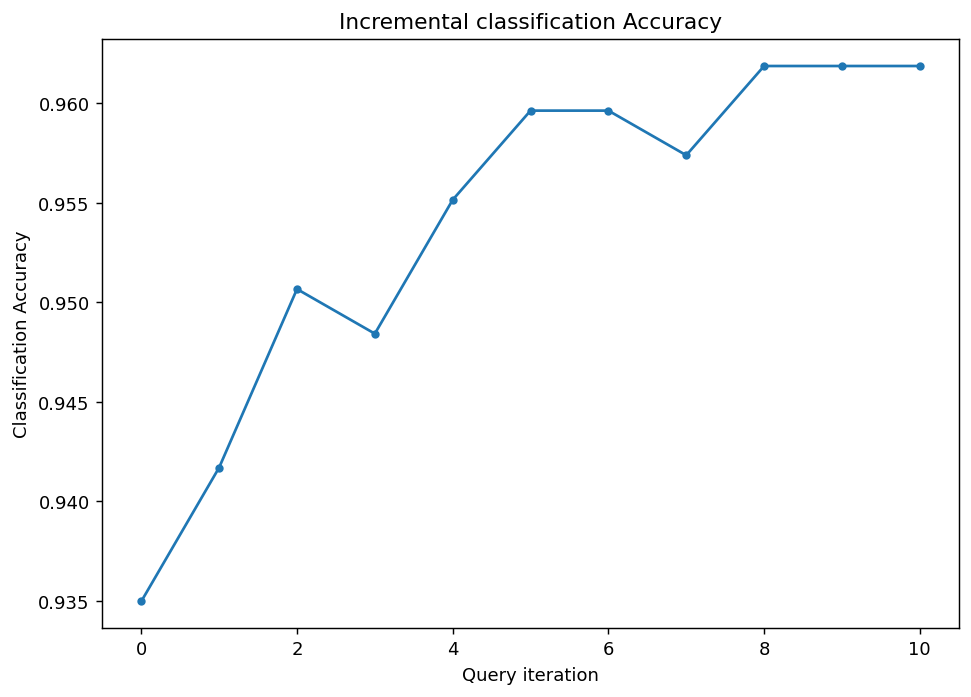

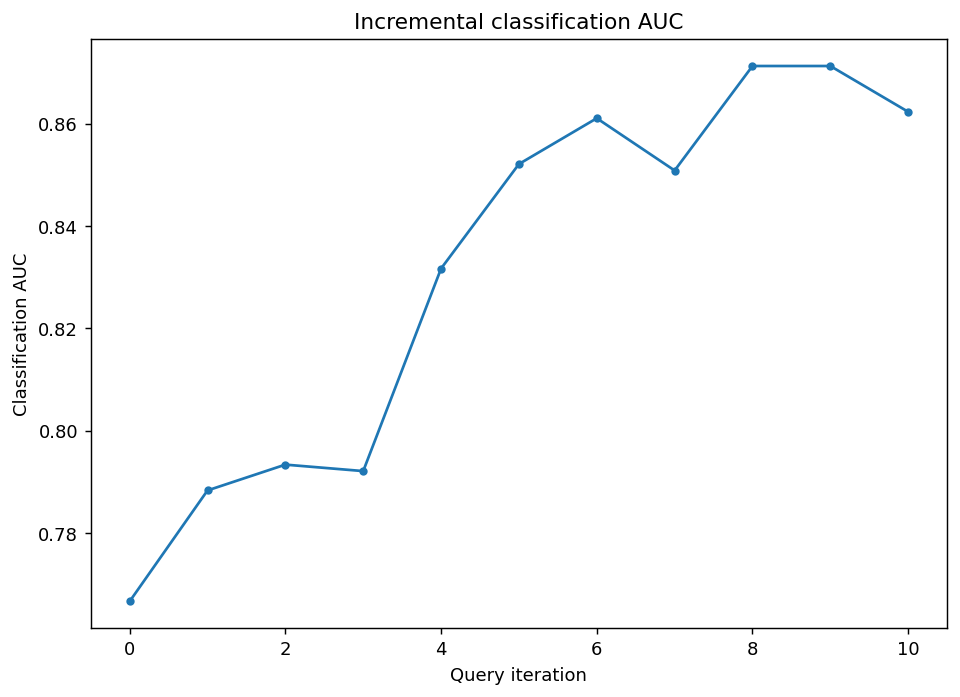

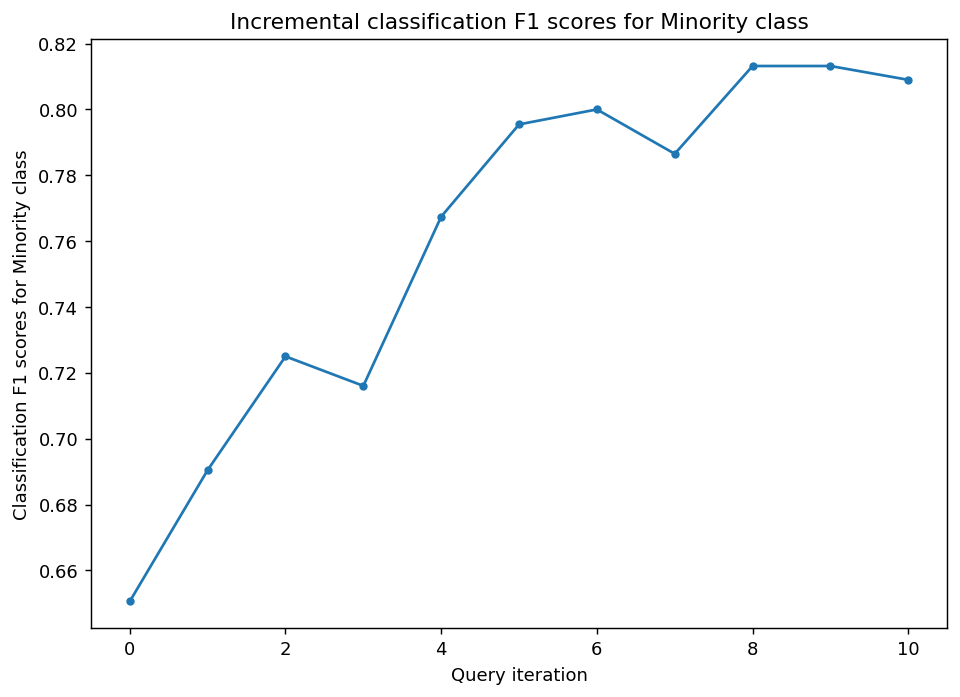

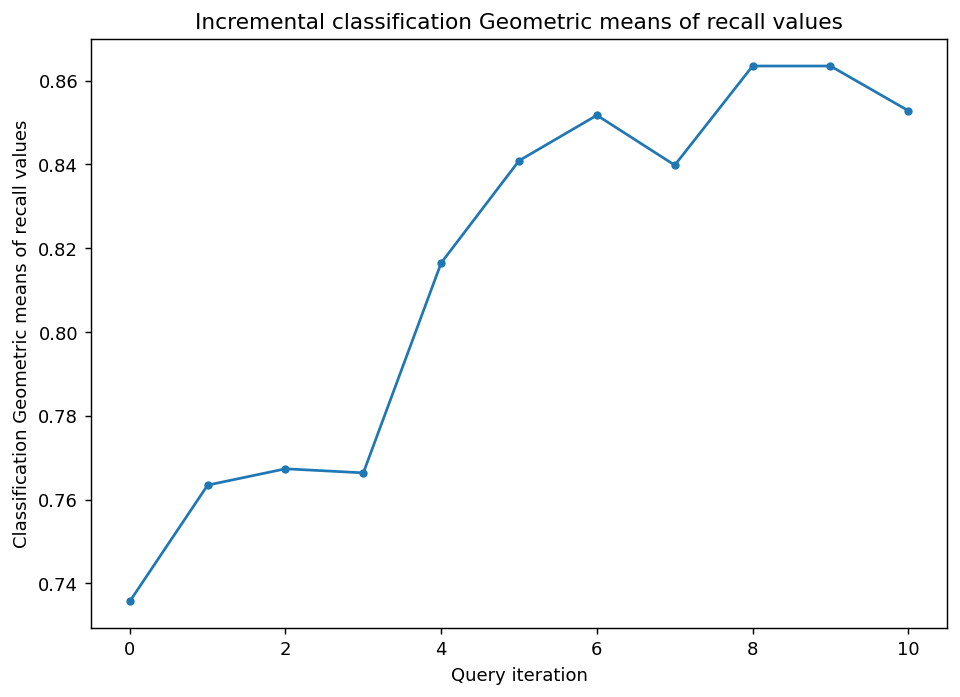

In [ ]:
# Actice Learning Main Module.

if __name__ == '__main__':
  
  BATCH_SIZE=10
  N_RAW_SAMPLES= 100

  y_raw= data['Class_Numerical']
  X_raw= data.drop('Class_Numerical', axis=1)

  # Prompting User to select a feature selection option.
  # Upon selecting a valid option, Best features are selected.

  print("---------------------------------------")
  print("Select Feature Selection option\n1: Recursive Feature Selection\n2: No Feature Selection")
  fs_option = int(input())
  print("---------------------------------------")
  if(fs_option == 1):
    print("Starting Feature Selection using Random Forest")
    X_raw = feature_selection(X_raw, y_raw)

  print("Shape of data set :" + str(X_raw.shape))
  # converting data from dataframe to ndarray
  y_raw = y_raw.values
  X_raw = X_raw.values

  # batch_data_continous_X,y stores data and adds to it after every iteration of batch
  batch_data_continous_X = np.array([]).reshape(0,X_raw.shape[1])
  batch_data_continous_y = np.array([]).reshape(0,1)

  # Spliting dataset into Train, Pool(for batch) and Test.
  print("Preparing Initial Training, Pool and Test sets for initial AL")
  X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.3, stratify=y_raw)
  X_train, X_pool, y_train, y_pool = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train)

  print("training set size: "+str(len(X_train)))
  print("pool set size: " + str(len(X_pool)))
  print("test set size: " + str(len(X_test)))

  # lists to store all metric values after each iteration
  accuracy_history = []
  auc_history = []
  f1_minority_history = []
  GM_history = []
  dt = DecisionTreeClassifier()

  # Prompting User to Active Learning Strategy from the list of available options.
  # Upon selecting a valid option, it creates batches using Active Learning Strategy provided.
  print("---------------------------------------")
  print("Select Strategy\n1: Ranked Batch using Uncertainity\n2: Query By Committee Batch")
  strategy_option = int(input())
  print("---------------------------------------")

  # Prompting User to provide batch size eg: 10.
  print("---------------------------------------")
  print("Enter Batch Size :(Default is 10)\n")
  BATCH_SIZE = int(input())
  N_RAW_SAMPLES = 10 * BATCH_SIZE
  print("---------------------------------------")

  # Prompting User to select an outlier detection method from the list of available options.
  # Upon selecting a valid option, it gets best outliers for every batch.
  print("---------------------------------------")
  print("Enter Outlier Detection Method")
  outlier_option = int(input(("1: LOF\n2: One Class SVM\n3: IForest\n4: No Outlier")))
  print("---------------------------------------")

  # Prompting User to select Data Sampling method from the list of available options.
  # Upon selecting a valid option, it samples batch_data_continous_X,y data for every batch.
  print("---------------------------------------")
  print("Enter Data sampling Technique for Imbalanced Data")
  sampling_option = int(input(("1: SMOTE\n2: ADASYN\n3: Random Oversampling\n4: No Sampling\n")))
  print("---------------------------------------")

  if(strategy_option == 1): # if option is Uncertainty Sampling
    if(outlier_option == 4): # No outlier detection
      preset_batch = partial(uncertainty_batch_sampling, n_instances=int(BATCH_SIZE))
    else:
      preset_batch = partial(uncertainty_batch_sampling, n_instances=int(BATCH_SIZE*0.7))
    # Specify our active learning model.
    learner = ActiveLearner(estimator=dt, X_training=X_train, y_training=y_train, query_strategy=preset_batch)

  elif(strategy_option == 2):
    n_members = 2
    n_initial = len(X_train)
    learner_list = list()
    for member_idx in range(n_members):

      train_idx = np.random.choice(range(X_train.shape[0]), size=int(n_initial/n_members), replace=False)
      X_train_temp = X_train[train_idx]
      y_train_temp = y_train[train_idx]

      # creating a reduced copy of the data with the known instances removed
      X_train = np.delete(X_train, train_idx, axis=0)
      y_train = np.delete(y_train, train_idx)

      # initializing learner
      learnerAL = ActiveLearner(estimator=RandomForestClassifier(), X_training=X_train_temp, y_training=y_train_temp)
      learner_list.append(learnerAL)

    # assembling the committee
    learner = Committee(learner_list=learner_list)

  batch_data_continous_X = np.vstack([batch_data_continous_X, X_train])
  batch_data_continous_y = np.append(batch_data_continous_y, y_train)



  # Initial training with trainset
  print("========================")
  print("Initial Training Results")
  # Isolate the data we'll need for plotting.
  predictions = learner.predict(X_test)
  is_correct = (predictions == y_test)

  model_accuracy = learner.score(X_test, y_test)
  predictions = learner.predict(X_test)
  print("========================")
  print('Accuracy after query {n}: {acc:0.4f}'.format(n=0, acc=model_accuracy))
  #print("This is"+ " "+ str(x+1) +" " + "iteration.")
  print(confusion_matrix(y_test, predictions))
  print(classification_report(y_test, predictions))
  print("AUC: "+str(roc_auc_score(y_test, predictions)))
  accuracy_history.append(model_accuracy)
  auc_history.append(roc_auc_score(y_test, predictions))
  f1_minority_history.append(f1_score(y_test, predictions, average=None)[-1])
  recal_values = recall_score(y_test, predictions, average=None)
  GM_history.append(math.sqrt(recal_values[0]*recal_values[-1]))
  
  N_QUERIES = int(N_RAW_SAMPLES // BATCH_SIZE)
  print("========================")
  print("Learning phase with "+ str(N_QUERIES)+" queries")
  print("Total number of records per batch "+ str(BATCH_SIZE)+"  divided into")
  if(outlier_option == 4):
    print("Uncertain samples: " + str(int(BATCH_SIZE)))
    print("outlier samples: 0")
  else:
    print("Uncertain samples: " + str(int(BATCH_SIZE * 0.7)))
    print("outlier samples: " + str(int(BATCH_SIZE * 0.3)))
    
  print("========================")
  for index in range(N_QUERIES):
    print("---------------------------------------")
    print("Learning phase Query: " + str(index + 1))

    print("Getting pool of data for learner using selected sampling method")
      
    if(strategy_option == 1):
      query_index, query_instance = learner.query(X_pool)
      # Teach our ActiveLearner model the record it has requested.
      X_batch, y_batch = X_pool[query_index], y_pool[query_index]
        
      # Remove the queried instance from the unlabeled pool.
      X_pool = np.delete(X_pool, query_index, axis=0)
      y_pool = np.delete(y_pool, query_index)
        
    elif (strategy_option == 2):

      if(outlier_option == 4):
        strategy_batch_size = int(BATCH_SIZE)
      else:
        strategy_batch_size = int(BATCH_SIZE*0.7)
        
      X_batch = np.array([]).reshape(0,X_pool.shape[1])
      y_batch = np.array([]).reshape(0,1)
      for strategy_batch_size_i in range(strategy_batch_size):
        
        query_index, query_instance = learner.query(X_pool)
        #Teach our ActiveLearner model the record it has requested.
        X_batch = np.vstack([X_batch, X_pool[query_index]])
        y_batch = np.append(y_batch, y_pool[query_index])

        # Remove the queried instance from the unlabeled pool.
        X_pool = np.delete(X_pool, query_index, axis=0)
        y_pool = np.delete(y_pool, query_index)


    print("getting Outliers from data pool")
    if(outlier_option == 1):
      outlier_index = Lof(X_pool, int(BATCH_SIZE*0.3))
    elif(outlier_option == 2):
      outlier_index = OneClassSVMOutlier(X_pool, int(BATCH_SIZE*0.3))
    elif(outlier_option == 3):
      outlier_index = IForest(X_pool, int(BATCH_SIZE * 0.3))
    else:
      outlier_index = []

    # Teach our ActiveLearner model the outlier record it has requested.
    X_outlier, y_outlier = X_pool[outlier_index], y_pool[outlier_index]

    # Remove the outlier instance from the unlabeled pool.
    X_pool = np.delete(X_pool, outlier_index, axis=0)
    y_pool = np.delete(y_pool, outlier_index)


    X_batch_l = X_batch.tolist()
    y_batch_l = y_batch.tolist()

    X_outlier_l =  X_outlier.tolist()
    y_outlier_l = y_outlier.tolist()

    X_batch_l.extend(X_outlier_l)
    y_batch_l.extend(y_outlier_l)

    X = np.array(X_batch_l)
    y = np.array(y_batch_l)

    batch_data_continous_X = np.vstack([batch_data_continous_X, X])
    batch_data_continous_y = np.append(batch_data_continous_y, y)
  
    teach_X = []
    teach_y = []
    print("Data Sampling with selected option")
    if(sampling_option == 1):
      oversample = SMOTE(k_neighbors=1)
      teach_X, teach_y = oversample.fit_resample(batch_data_continous_X, batch_data_continous_y)
    elif(sampling_option == 2):
      oversample = ADASYN()
      teach_X, teach_y = oversample.fit_resample(batch_data_continous_X, batch_data_continous_y)
    elif(sampling_option == 3):
      oversample = RandomOverSampler(sampling_strategy='minority')
      teach_X, teach_y = oversample.fit_resample(batch_data_continous_X, batch_data_continous_y)
    else:
      teach_X = batch_data_continous_X
      teach_y = batch_data_continous_y
      
    print("teach with query using uncertainity and outlier data")
    learner.teach(X=teach_X, y=teach_y)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_test, y_test)
    predictions = learner.predict(X_test)
    print("========================")
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))
    print("AUC: " + str(roc_auc_score(y_test, predictions)))

    accuracy_history.append(model_accuracy)
    auc_history.append(roc_auc_score(y_test, predictions))
    f1_minority_history.append(f1_score(y_test, predictions, average=None)[-1])
    recal_values = recall_score(y_test, predictions, average=None)
    GM_history.append(math.sqrt(recal_values[0] * recal_values[-1]))

  # Plot metrics
  plotGraph(accuracy_history,'Accuracy')
  plotGraph(auc_history, 'AUC')
  plotGraph(f1_minority_history, 'F1 scores for Minority class')
  plotGraph(GM_history, 'Geometric means of recall values')

In [ ]:
1114314#Calculating the mean of the accuracy:

def Mean_of_accuracy(lst):
  return sum(lst)/len(lst)

lst= accuracy_history
mean1= Mean_of_accuracy(lst)
print(mean1)

0.9486343253159397


In [ ]:
# Calculating the mean of the AUC:

def Mean_of_auc(lst1):
  return sum(lst1)/len(lst1)

lst1= auc_history
mean2= Mean_of_auc(lst1)
print(mean2)

0.8223410270909371


In [ ]:
# Calculating the F1 scores for the minority values:

def Mean_of_F1(lst2):
  return sum(lst2)/len(lst2)

lst2= f1_minority_history
mean3= Mean_of_F1(lst2)
print(mean3)

0.7382298992612387


In [ ]:
# calculating the G-Mean Scores:

def Mean_of_GM(lst3):
  return sum(lst3)/len(lst3)

lst3= GM_history
mean4= Mean_of_GM(lst3)
print(mean4)

0.8059740626932254


In [ ]:
print(accuracy_history)
print(auc_history)
print(f1_minority_history)
print(GM_history)

[0.9349775784753364, 0.9417040358744395, 0.9506726457399103, 0.9484304932735426, 0.9551569506726457, 0.9596412556053812, 0.9596412556053812, 0.9573991031390134, 0.9618834080717489, 0.9618834080717489, 0.9618834080717489]
[0.7666940831748316, 0.7883616922839665, 0.7933994756592813, 0.7921400298154526, 0.8316969105022363, 0.8521050737675424, 0.8610497095563667, 0.8508456279237137, 0.8712537911890197, 0.8712537911890197, 0.8623091554001954]
[0.6506024096385542, 0.6904761904761905, 0.7249999999999999, 0.7160493827160493, 0.7674418604651163, 0.7954545454545455, 0.8, 0.7865168539325842, 0.8131868131868131, 0.8131868131868131, 0.8089887640449438]
[0.7357341116750676, 0.7634737054444333, 0.7673690047369232, 0.7663970360064458, 0.8165070740564774, 0.8408857716077776, 0.8517281291852113, 0.8398152609616478, 0.8634766583681341, 0.8634766583681341, 0.8528138251379818]


In [ ]:
def accu(mylist):
  mylist.append(accuracy_history)
  return mylist

mylist=accuracy_history
#res_df= pd.DataFrame(mylist)
ans= accu(mylist)
print(ans)
#print(res_df)

[0.9439461883408071, 0.9327354260089686, 0.9147982062780269, 0.92152466367713, 0.9170403587443946, 0.9013452914798207, 0.9192825112107623, 0.9237668161434978, 0.9192825112107623, 0.92152466367713, 0.9147982062780269, [...]]


In [ ]:
type(res_df)

pandas.core.frame.DataFrame